<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Analysis-for-Australian-Population/blob/main/Population_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hoangcuongnguyen2001/Analysis-for-Australian-Population/main/Australian%20Population%20Analysis/dataset/population_distribution.csv")
df.describe()
df.head()

,Year,Total_capital_cities,Total_rest_of_state
0,1921,2402579,3108870
1,1922,2481060,3152961
2,1923,2555340,3197826
3,1924,2631750,3247570
4,1925,2704210,3296020


In [17]:
#Source: https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

def reformat_large_tick_values(tick_val, pos):
   
    # Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
   
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

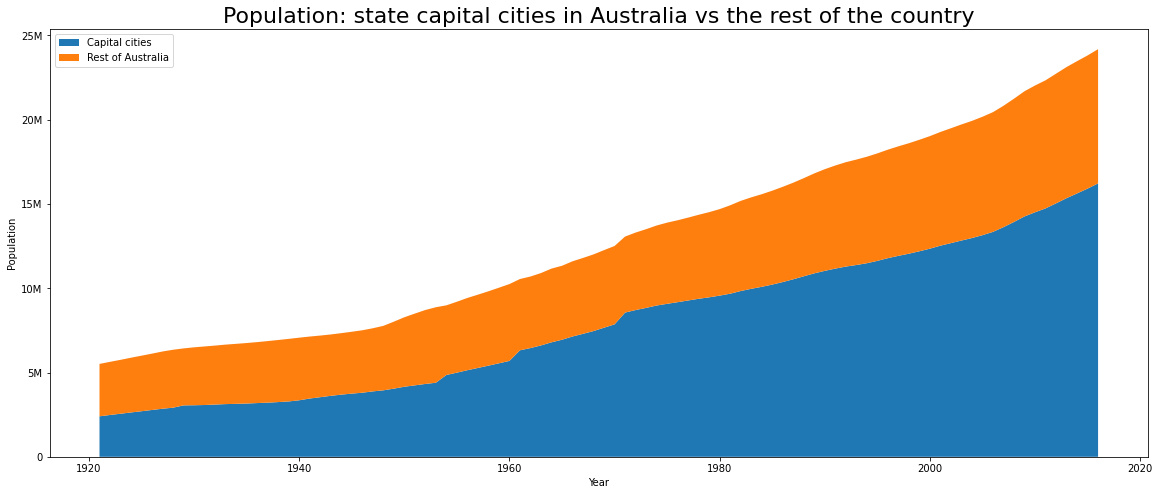

In [20]:
capital = df["Total_capital_cities"]
rest_of_state = df["Total_rest_of_state"]
year = df["Year"]


def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))    
plt.title("Population: state capital cities in Australia vs the rest of the country", fontsize=22)
plt.stackplot(year, capital, rest_of_state, labels=["Capital cities", "Rest of Australia"])
plt.legend(loc= 'upper left')

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [30]:
def reformat_percentage_tick_values(tick_val, pos):
       val = round(tick_val*100, 1)
       new_tick_format = '{:}'.format(val)

       new_tick_format = str(new_tick_format)
       
       return new_tick_format

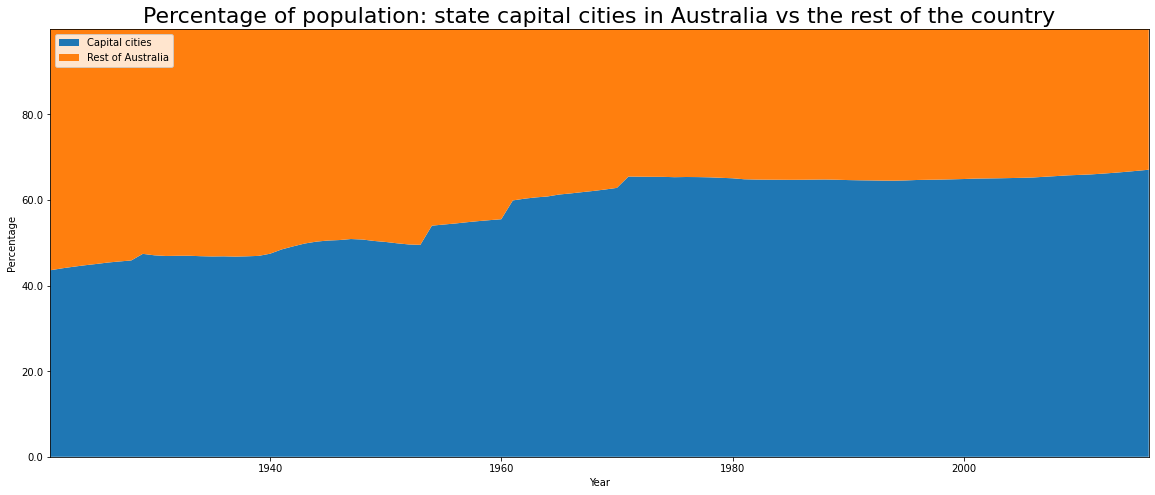

In [37]:
data_perc = df.divide(df.sum(axis=1), axis=0)

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20))) 
plt.title("Percentage of population: state capital cities in Australia vs the rest of the country", fontsize=22)
plt.stackplot(year, data_perc["Total_capital_cities"], data_perc["Total_rest_of_state"], labels=["Capital cities", "Rest of Australia"])
plt.legend(loc= 'upper left')
plt.margins(0,0)


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_percentage_tick_values));

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()